In [256]:
import numpy as np
import pandas as pd
from pandas import json_normalize
import ast
from datetime import datetime, timedelta
import seaborn as sns
sns.set()
sns.set_style("white")
#sns.set_palette("GnBu_d")
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_colwidth', None)

In [257]:
data = pd.read_pickle("preparedData.pkl")
original = pd.read_pickle("preparedData.pkl")

data

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,combinedSpaceStationID,timeConnected,idleTime,chargingTime,weekday,month,time,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture
0,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1,194.0,AG-3F30/1-1-179-810,21741.0,5980.0,15761.0,3,1,13:08:54,250.0,25.00,100.0,463.0,"Thu, 02 Jan 2020 13:09:39 GMT",True,"Thu, 02 Jan 2020 20:51:54 GMT"
1,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1,4275.0,AG-1F01/1-1-193-825,32491.0,8416.0,24075.0,3,1,13:36:50,280.0,70.00,250.0,595.0,"Thu, 02 Jan 2020 13:37:11 GMT",True,"Thu, 02 Jan 2020 23:31:50 GMT"
2,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1,344.0,AG-1F03/1-1-193-829,38567.0,29056.0,9511.0,3,1,13:56:35,400.0,8.00,20.0,60.0,"Thu, 02 Jan 2020 13:57:17 GMT",True,"Thu, 02 Jan 2020 14:56:35 GMT"
3,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1,1117.0,AG-1F04/1-1-193-820,9521.0,4794.0,4727.0,3,1,13:59:58,400.0,8.00,20.0,65.0,"Thu, 02 Jan 2020 14:00:03 GMT",True,"Thu, 02 Jan 2020 15:04:58 GMT"
4,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1,334.0,AG-1F06/1-1-193-819,29319.0,13870.0,15449.0,3,1,14:00:01,400.0,16.00,40.0,504.0,"Thu, 02 Jan 2020 14:00:13 GMT",True,"Thu, 02 Jan 2020 22:24:01 GMT"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56531,2019-07-01 19:13:11+00:00,2019-07-02 00:44:40+00:00,2019-07-01 21:13:56+00:00,6.048,1,2643.0,AG-3F23/1-1-179-797,19889.0,12644.0,7245.0,0,7,19:13:11,275.0,8.25,30.0,374.0,"Mon, 01 Jul 2019 19:13:10 GMT",True,"Tue, 02 Jul 2019 01:27:11 GMT"
56532,2019-07-01 19:43:46+00:00,2019-07-02 02:58:53+00:00,2019-07-02 02:43:53+00:00,41.047,1,394.0,AG-4F38/1-1-191-793,26107.0,900.0,25207.0,0,7,19:43:46,231.0,36.96,160.0,310.0,"Mon, 01 Jul 2019 19:43:58 GMT",True,"Tue, 02 Jul 2019 00:53:46 GMT"
56533,2019-07-01 20:34:30+00:00,2019-07-02 00:30:52+00:00,2019-07-01 21:27:44+00:00,5.390,1,2276.0,AG-3F15/1-1-179-813,14182.0,10988.0,3194.0,0,7,20:34:30,300.0,12.00,40.0,381.0,"Mon, 01 Jul 2019 20:34:29 GMT",True,"Tue, 02 Jul 2019 02:55:30 GMT"
56534,2019-07-01 21:49:12+00:00,2019-07-02 01:37:18+00:00,2019-07-01 23:14:33+00:00,8.399,1,1346.0,AG-3F18/1-1-179-798,13686.0,8565.0,5121.0,0,7,21:49:12,400.0,32.00,80.0,36.0,"Mon, 01 Jul 2019 21:49:37 GMT",True,"Mon, 01 Jul 2019 22:25:12 GMT"


In [258]:
data["hour_connecttime"] = data["connectionTime"].dt.hour
data["hour_disconnecttime"] = data["disconnectTime"].dt.hour

data['date_connecttime'] = data['connectionTime'].dt.date
data['weekday_connecttime'] = data['connectionTime'].dt.weekday
data['month_connecttime'] = data['connectionTime'].dt.month
data["chargingTime_minutes"] = data["chargingTime"]/60


data["hour_connecttime"] = (data["hour_connecttime"] - 8) % 24
data["hour_connecttime"]= data["hour_connecttime"].astype(int)

data["connectionhour"] = (data["hour_connecttime"] - 8) % 24
data["connectionhour"]= data["hour_connecttime"].astype(int)

data["hour_disconnecttime"] = (data["hour_disconnecttime"] - 8) % 24
data["hour_disconnecttime"]= data["hour_disconnecttime"].astype(int)


In [259]:
original["hour_connecttime"] = original["connectionTime"].dt.hour
original["hour_disconnecttime"] = original["disconnectTime"].dt.hour

original['date_connecttime'] = original['connectionTime'].dt.date
original['weekday_connecttime'] = original['connectionTime'].dt.weekday
original['month_connecttime'] = original['connectionTime'].dt.month
original["chargingTime_minutes"] = original["chargingTime"]/60


original["hour_connecttime"] = (original["hour_connecttime"] - 8) % 24
original["hour_connecttime"]= original["hour_connecttime"].astype(int)

original["connectionhour"] = (original["hour_connecttime"] - 8) % 24
original["connectionhour"]= original["hour_connecttime"].astype(int)

original["hour_disconnecttime"] = (original["hour_disconnecttime"] - 8) % 24
original["hour_disconnecttime"]= original["hour_disconnecttime"].astype(int)


In [260]:
#original data is here safe:
alldata=data.copy()
alldata=alldata.drop(['userID', 'kWhDelivered','kWhRequested','milesRequested','WhPerMile','minutesAvailable','modifiedAt','paymentRequired','requestedDeparture'], axis=1)
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56536 entries, 0 to 56535
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   connectionTime          56536 non-null  datetime64[ns, UTC]
 1   disconnectTime          56536 non-null  datetime64[ns, UTC]
 2   doneChargingTime        56536 non-null  datetime64[ns, UTC]
 3   siteID                  56536 non-null  int64              
 4   combinedSpaceStationID  56536 non-null  object             
 5   timeConnected           56536 non-null  float64            
 6   idleTime                56536 non-null  float64            
 7   chargingTime            56536 non-null  float64            
 8   weekday                 56536 non-null  int32              
 9   month                   56536 non-null  int32              
 10  time                    56536 non-null  object             
 11  hour_connecttime        56536 non-null  i

In [261]:
#create a second df with only unregistered users
unsubscribed_df = data[data['userID'].isnull()]
# Drop the 'userID' and 'kWhDelivered' columns from 'data_with_nulls'
unsubscribed_df = unsubscribed_df.drop(['userID', 'kWhDelivered','kWhRequested','milesRequested','WhPerMile','minutesAvailable','modifiedAt','paymentRequired','requestedDeparture'], axis=1)

In [262]:
unsubscribed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15227 entries, 11 to 56493
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   connectionTime          15227 non-null  datetime64[ns, UTC]
 1   disconnectTime          15227 non-null  datetime64[ns, UTC]
 2   doneChargingTime        15227 non-null  datetime64[ns, UTC]
 3   siteID                  15227 non-null  int64              
 4   combinedSpaceStationID  15227 non-null  object             
 5   timeConnected           15227 non-null  float64            
 6   idleTime                15227 non-null  float64            
 7   chargingTime            15227 non-null  float64            
 8   weekday                 15227 non-null  int32              
 9   month                   15227 non-null  int32              
 10  time                    15227 non-null  object             
 11  hour_connecttime        15227 non-null  int32

In [263]:
#drop all null values therefore also the unregistered users
data=data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41309 entries, 0 to 56535
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   connectionTime          41309 non-null  datetime64[ns, UTC]
 1   disconnectTime          41309 non-null  datetime64[ns, UTC]
 2   doneChargingTime        41309 non-null  datetime64[ns, UTC]
 3   kWhDelivered            41309 non-null  float64            
 4   siteID                  41309 non-null  int64              
 5   userID                  41309 non-null  float64            
 6   combinedSpaceStationID  41309 non-null  object             
 7   timeConnected           41309 non-null  float64            
 8   idleTime                41309 non-null  float64            
 9   chargingTime            41309 non-null  float64            
 10  weekday                 41309 non-null  int32              
 11  month                   41309 non-null  int32 

### KPI 1 Charging Duration

In order to complete hourly KPI analysis, we need to add further information to our charging_sessions_modified dataset such as the respective hour for the connectionTime and the conversion of the idleTime (describing how long a car is still connected to the device even though it is already fully charged) in minutes.

Text(0.5, 1.0, 'Median duration of a charging session per hour by Unregistered Customers (KPI)')

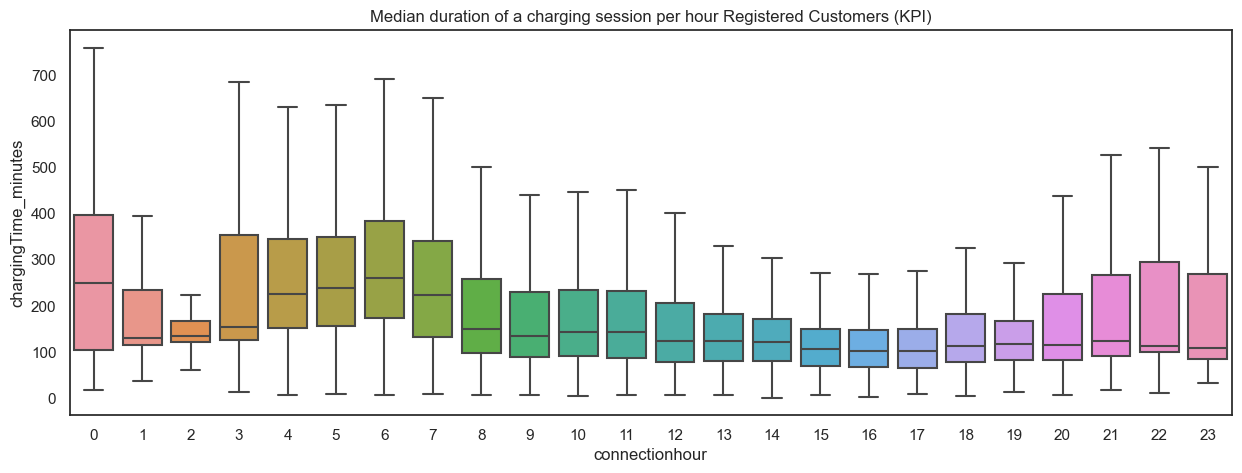

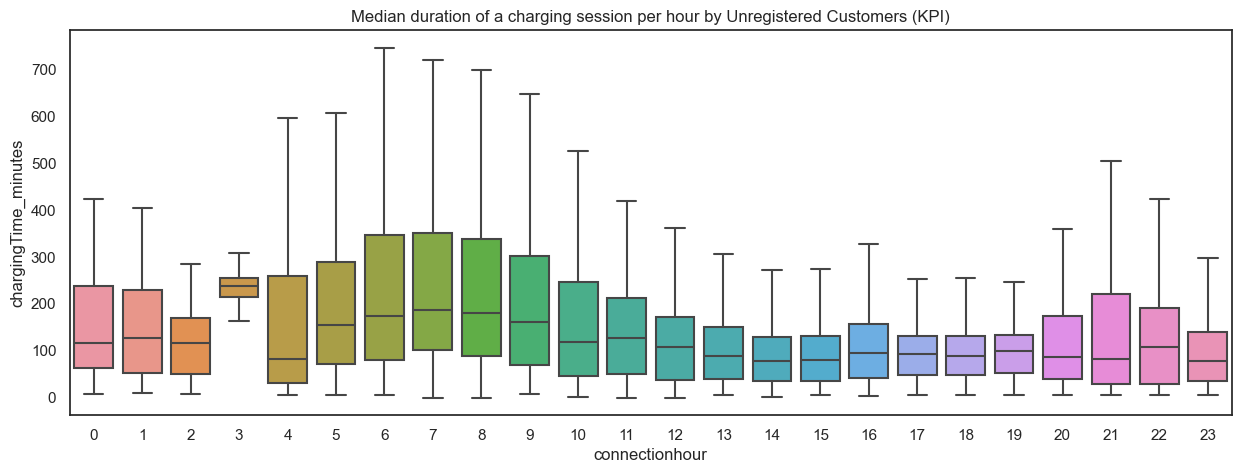

In [264]:
f, axes = plt.subplots(1, 1, figsize=(15, 5))

sns.boxplot(x = "connectionhour", y = "chargingTime_minutes", data= data, ax=axes, showfliers=False)
axes.set_title("Median duration of a charging session per hour Registered Customers (KPI)")
f, axes = plt.subplots(1, 1, figsize=(15, 5))


avg_charging_duration = unsubscribed_df.groupby('connectionhour')['chargingTime_minutes'].mean()
sns.boxplot(x = "connectionhour", y = "chargingTime_minutes", data= unsubscribed_df, ax=axes,showfliers=False)
axes.set_title("Median duration of a charging session per hour by Unregistered Customers (KPI)")

### KPI 2 Session duration

<ipython-input-265-d06ef6110296>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['timeConnected_minutes']=(data['timeConnected']/60)


Average Session Duration by registered users: 412.79105965608784
Average Session Duration by unregistered users: 335.8986504235897


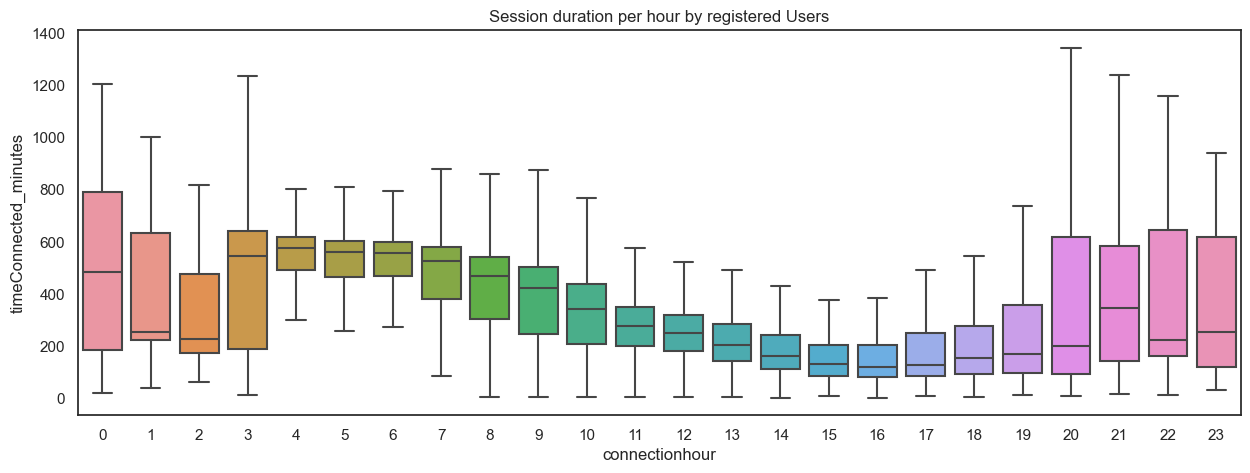

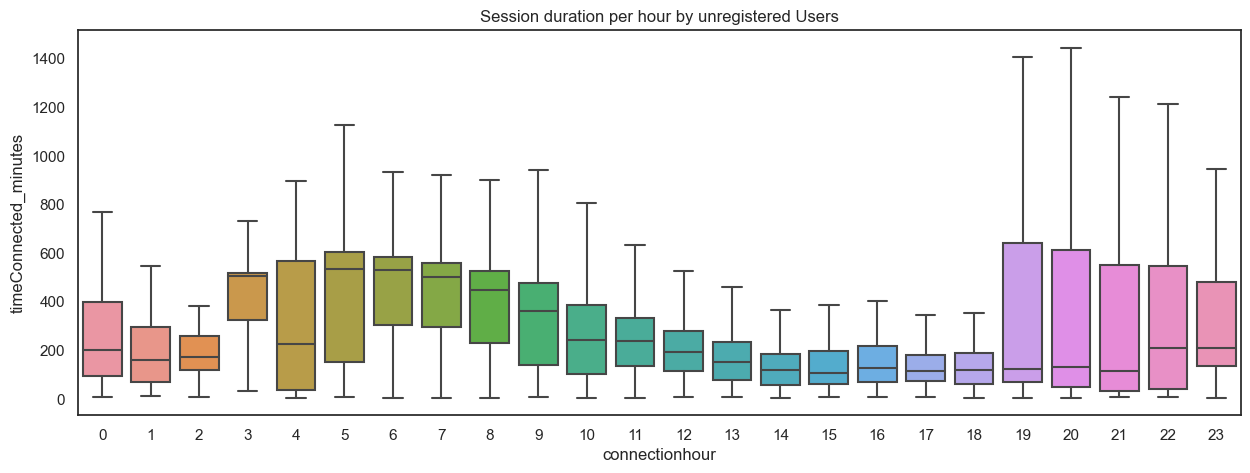

In [265]:
#Add the session duration 

data['timeConnected_minutes']=(data['timeConnected']/60)
avg_session_duration = data['timeConnected_minutes'].mean()
registered_avg_duration_per_hour = data.groupby('connectionhour')['timeConnected_minutes'].mean()
# Print the average session duration
print("Average Session Duration by registered users:", avg_session_duration)

#
f, axes = plt.subplots(1, 1, figsize=(15, 5))

sns.boxplot(x = "connectionhour", y = "timeConnected_minutes", data= data, ax=axes, showfliers=False)
#sns.lineplot(x=registered_avg_duration_per_hour.index, y=registered_avg_duration_per_hour.values, label='Registered Users')

axes.set_title("Session duration per hour by registered Users")


f, axes = plt.subplots(1, 1, figsize=(15, 5))
unsubscribed_df['timeConnected_minutes']=(unsubscribed_df['timeConnected']/60)
avg_session_duration = unsubscribed_df['timeConnected_minutes'].mean()
unregistered_avg_duration_per_hour = unsubscribed_df.groupby('connectionhour')['timeConnected_minutes'].mean()


sns.boxplot(x = "connectionhour", y = "timeConnected_minutes", data= unsubscribed_df, ax=axes, showfliers=False)
#sns.lineplot(x=unregistered_avg_duration_per_hour.index, y=unregistered_avg_duration_per_hour.values, label='Unregistered Users')

axes.set_title("Session duration per hour by unregistered Users")
# Anzeigen oder Verwenden der durchschnittlichen Dauer einer Session
print("Average Session Duration by unregistered users:", avg_session_duration)


### KPI 3 Idle time

In [266]:
data["idleTime_minutes"] = data["idleTime"]/60
unsubscribed_df["idleTime_minutes"] = unsubscribed_df["idleTime"]/60

<ipython-input-266-c97e2a224e8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["idleTime_minutes"] = data["idleTime"]/60


Text(0.5, 1.0, 'Median idleTime of a charging session of the unregistered customers per hour (KPI)')

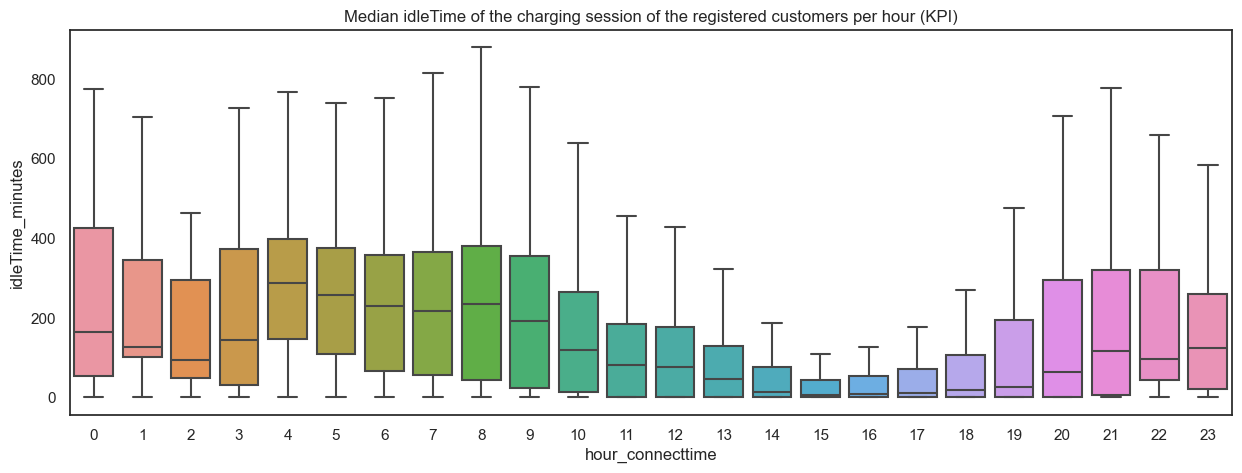

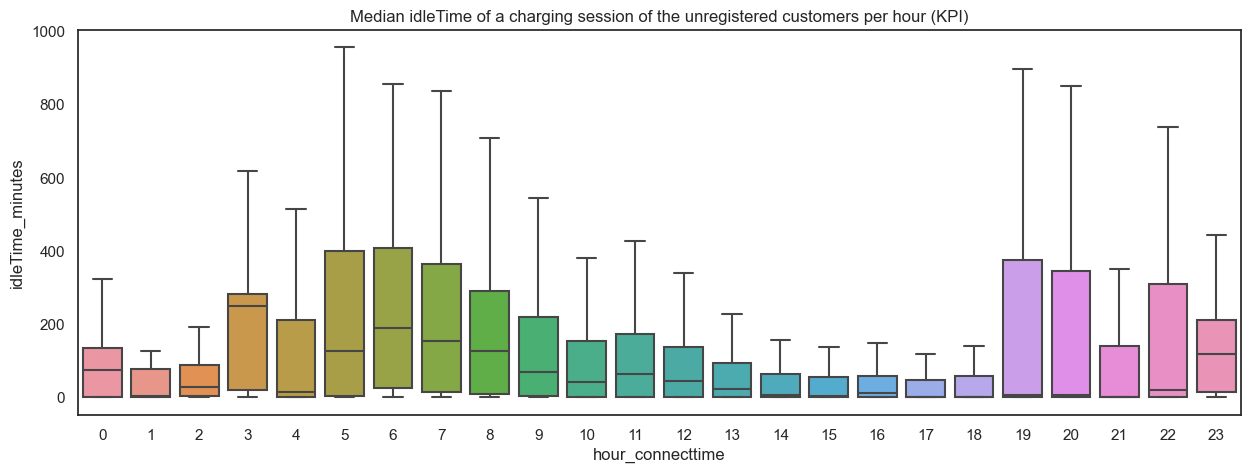

In [267]:
f, axes = plt.subplots(1, 1, figsize=(15, 5))

sns.boxplot(x = "hour_connecttime", y = "idleTime_minutes", data= data, ax=axes, showfliers=False)
axes.set_title("Median idleTime of the charging session of the registered customers per hour (KPI)")
f, axes = plt.subplots(1, 1, figsize=(15, 5))

sns.boxplot(x = "hour_connecttime", y = "idleTime_minutes", data= unsubscribed_df, ax=axes, showfliers=False)
axes.set_title("Median idleTime of a charging session of the unregistered customers per hour (KPI)")

<ipython-input-268-d635971de813>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['efficiency'] = data['chargingTime_minutes'] / data['timeConnected_minutes']


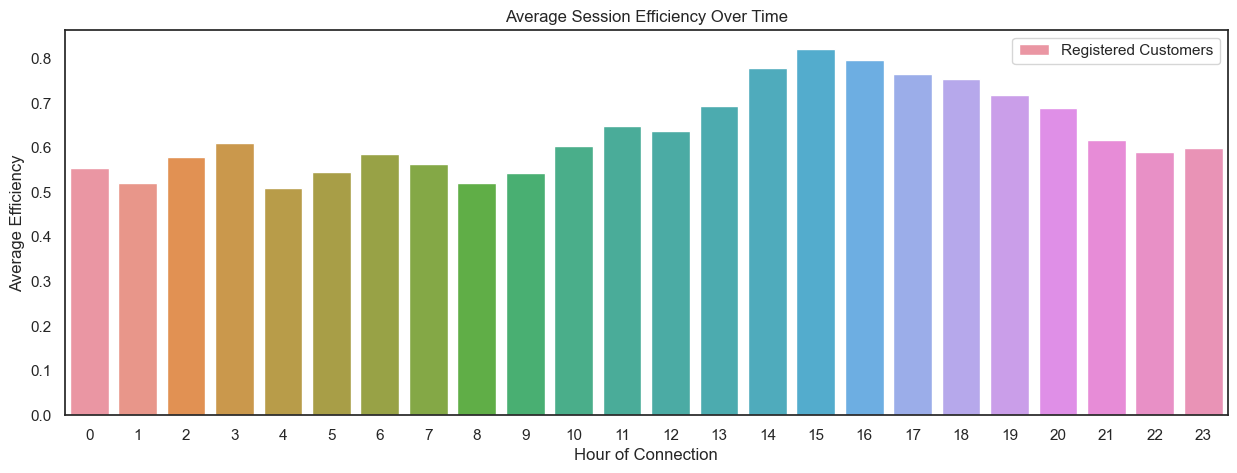

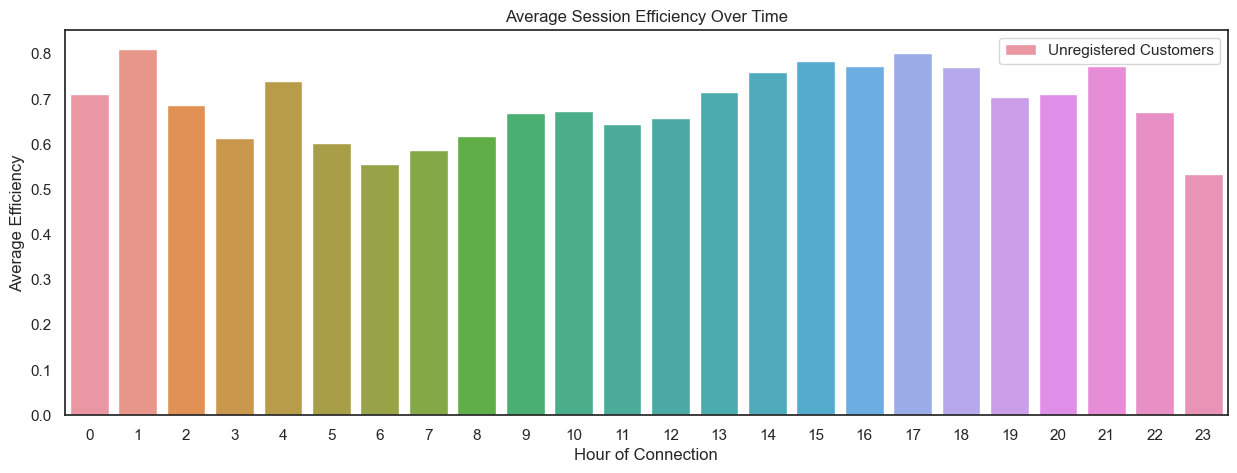

In [268]:
#session efficiency:
#timeConnected_minutes=chargingTime_minutes+idleTime_minutes

#efficiency=chargingTime_miniutes/timeConnected_minutes

# Assuming you have 'chargingTime_minutes' and 'idleTime_minutes' columns in your DataFrame

# Calculate 'efficiency' using the formula: efficiency = chargingTime_minutes / timeConnected_minutes
data['efficiency'] = data['chargingTime_minutes'] / data['timeConnected_minutes']
unsubscribed_df['efficiency'] = unsubscribed_df['chargingTime_minutes'] / unsubscribed_df['timeConnected_minutes']

# Calculate the average efficiency for each hour
avg_efficiency_data = data.groupby('hour_connecttime')['efficiency'].mean().reset_index()
avg_efficiency_unsubscribed = unsubscribed_df.groupby('hour_connecttime')['efficiency'].mean().reset_index()

# Plotting the average efficiency over time
f, axes = plt.subplots(1, 1, figsize=(15, 5))

sns.barplot(x="hour_connecttime", y="efficiency", data=avg_efficiency_data, label="Registered Customers")

axes.set_title("Average Session Efficiency Over Time")
axes.set_xlabel("Hour of Connection")
axes.set_ylabel("Average Efficiency")
axes.legend()

f, axes = plt.subplots(1, 1, figsize=(15, 5))
sns.barplot(x="hour_connecttime", y="efficiency", data=avg_efficiency_unsubscribed, label="Unregistered Customers")

axes.set_title("Average Session Efficiency Over Time")
axes.set_xlabel("Hour of Connection")
axes.set_ylabel("Average Efficiency")
axes.legend()



### KPI4 Genral Demand
Number of connections per hour

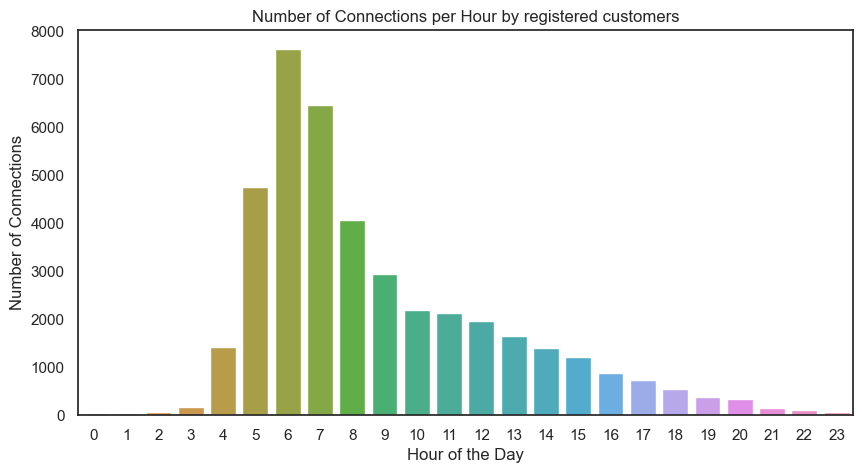

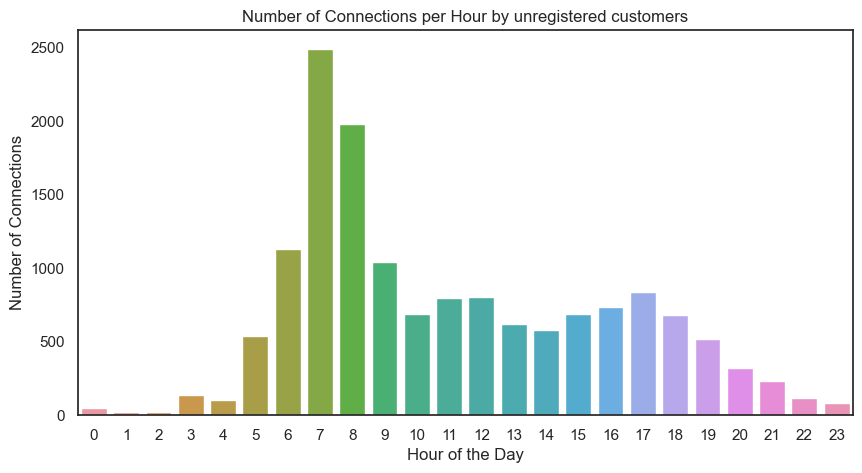

In [269]:
# Group the data by the 'hour' column and count the number of connections
connections_per_hour = data.groupby('hour_connecttime').size().reset_index(name='Number of Connections')

# Create a boxplot using Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x='hour_connecttime', y='Number of Connections', data=connections_per_hour)
plt.title('Number of Connections per Hour by registered customers')
plt.ylabel('Number of Connections')
plt.xlabel('Hour of the Day')
plt.show()

# Group the data by the 'hour' column and count the number of connections
connections_per_hour = unsubscribed_df.groupby('hour_connecttime').size().reset_index(name='Number of Connections')

# Create a boxplot using Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x='hour_connecttime', y='Number of Connections', data=connections_per_hour)
plt.title('Number of Connections per Hour by unregistered customers')
plt.ylabel('Number of Connections')
plt.xlabel('Hour of the Day')
plt.show()

## Proportion of the stations 

In [270]:
#calculate the number of stations
number_stations = len(data["combinedSpaceStationID"].unique())
number_stations

105

In [271]:
#calculate the number of stations
number_stations_unregistered = len(unsubscribed_df["combinedSpaceStationID"].unique())
number_stations_unregistered

106

In [272]:
#create a dataframe with the number of different stations IDs occupied every hour
charging_sessions_modified_tempered_hour123 = data.groupby([data["connectionTime"].dt.date,"hour_connecttime"])["combinedSpaceStationID"].nunique()
charging_sessions_modified_tempered_hour123= pd.DataFrame(charging_sessions_modified_tempered_hour123)

In [273]:
charging_sessions_modified_tempered_hour123

combinedSpaceStationID
connectionTime hour_connecttime                        
2018-04-30     7                                      1
2018-05-07     6                                      1
2018-05-11     7                                      1
2018-05-14     5                                      1
2018-05-15     16                                     1
...                                                 ...
2021-09-13     15                                     1
               16                                     1
               17                                     1
2021-09-14     17                                     1
               21                                     1

[10501 rows x 1 columns]

In [274]:
#create a dataframe with the number of different stations IDs occupied every hour
charging_sessions_modified_tempered_hour123_unregistered = unsubscribed_df.groupby([unsubscribed_df["connectionTime"].dt.date,"hour_connecttime"])["combinedSpaceStationID"].nunique()
charging_sessions_modified_tempered_hour123_unregistered= pd.DataFrame(charging_sessions_modified_tempered_hour123_unregistered)

In [275]:
charging_sessions_modified_tempered_hour123_unregistered

combinedSpaceStationID
connectionTime hour_connecttime                        
2018-04-25     5                                      2
               6                                      5
               7                                     14
               8                                      8
               9                                      1
...                                                 ...
2021-09-11     8                                      1
               19                                     1
2021-09-13     7                                      1
               8                                      1
               9                                      1

[5689 rows x 1 columns]

In this dataframe we see the number of different stations occupied every hour. In the next step we divide it with the number of stages to get the proportion in percent.

In [276]:
#insert a new column with the calculated proportion of the fleet borrowed every hour
charging_sessions_modified_tempered_hour123["percentage"]=(charging_sessions_modified_tempered_hour123["combinedSpaceStationID"]/number_stations)*100

In [277]:
charging_sessions_modified_tempered_hour123

combinedSpaceStationID  percentage
connectionTime hour_connecttime                                    
2018-04-30     7                                      1    0.952381
2018-05-07     6                                      1    0.952381
2018-05-11     7                                      1    0.952381
2018-05-14     5                                      1    0.952381
2018-05-15     16                                     1    0.952381
...                                                 ...         ...
2021-09-13     15                                     1    0.952381
               16                                     1    0.952381
               17                                     1    0.952381
2021-09-14     17                                     1    0.952381
               21                                     1    0.952381

[10501 rows x 2 columns]

As we can see a third column with percent values

In this dataframe we see the number of different stations occupied every hour. In the next step we divide it with the number of stages to get the proportion in percent.

In [278]:
#insert a new column with the calculated proportion of the stations used every hour
charging_sessions_modified_tempered_hour123_unregistered["percentage"]=(charging_sessions_modified_tempered_hour123_unregistered["combinedSpaceStationID"]/number_stations)*100

In [279]:
charging_sessions_modified_tempered_hour123_unregistered

combinedSpaceStationID  percentage
connectionTime hour_connecttime                                    
2018-04-25     5                                      2    1.904762
               6                                      5    4.761905
               7                                     14   13.333333
               8                                      8    7.619048
               9                                      1    0.952381
...                                                 ...         ...
2021-09-11     8                                      1    0.952381
               19                                     1    0.952381
2021-09-13     7                                      1    0.952381
               8                                      1    0.952381
               9                                      1    0.952381

[5689 rows x 2 columns]

Now we can plot it in a boxplot to the proportion of the stations occupied per day

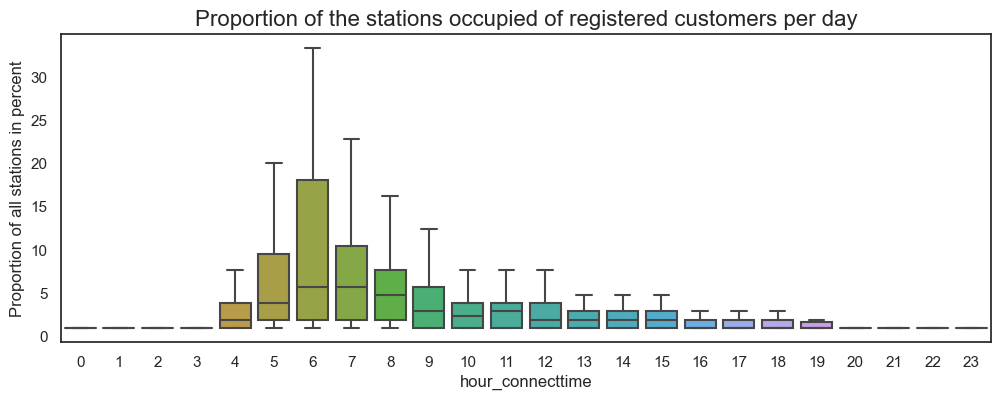

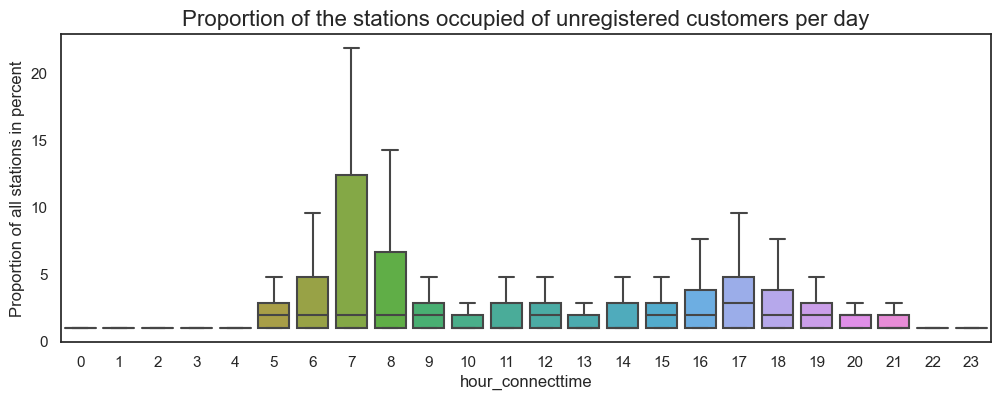

In [280]:
#plot the calculated proportion of the fleet borrowed per day
fig,ax = plt.subplots(figsize=(12,4)) 
sns.boxplot(x=charging_sessions_modified_tempered_hour123.index.get_level_values(1), y=charging_sessions_modified_tempered_hour123["percentage"],ax=ax, showfliers=False)
ax.set_title("Proportion of the stations occupied of registered customers per day",fontsize=16)
plt.ylabel('Proportion of all stations in percent')
plt.savefig("dayproportion.jpeg")

plt.show()

#plot the calculated proportion of the fleet borrowed per day
fig,ax = plt.subplots(figsize=(12,4)) 
sns.boxplot(x=charging_sessions_modified_tempered_hour123_unregistered.index.get_level_values(1), y=charging_sessions_modified_tempered_hour123_unregistered["percentage"],ax=ax, showfliers=False)
ax.set_title("Proportion of the stations occupied of unregistered customers per day",fontsize=16)
plt.ylabel('Proportion of all stations in percent')
plt.savefig("dayproportion.jpeg")
plt.show()

It also can be interesting to calculate the proportion of the stations occupied per week and the whole year. Because of this we plot two another visualizations for week and year in the same way.

In [281]:
#create a dataframe with the number of different stations IDs borrowed in a week
charging_sessions_modified_tempered_week1= data.groupby([data["connectionTime"].dt.date,"weekday"])["combinedSpaceStationID"].nunique()
charging_sessions_modified_tempered_week1= pd.DataFrame(charging_sessions_modified_tempered_week1)

In [282]:
#create a dataframe with the number of different stations IDs borrowed in a week
charging_sessions_modified_tempered_week1_unregistered= unsubscribed_df.groupby([unsubscribed_df["connectionTime"].dt.date,"weekday"])["combinedSpaceStationID"].nunique()
charging_sessions_modified_tempered_week1_unregistered= pd.DataFrame(charging_sessions_modified_tempered_week1_unregistered)

In [283]:
#insert a new column with the calculated proportion of the fleet borrowed in one week
charging_sessions_modified_tempered_week1["percentage"]=(charging_sessions_modified_tempered_week1["combinedSpaceStationID"]/number_stations_unregistered)*100

In [284]:
#insert a new column with the calculated proportion of the fleet borrowed in one week
charging_sessions_modified_tempered_week1_unregistered["percentage"]=(charging_sessions_modified_tempered_week1_unregistered["combinedSpaceStationID"]/number_stations_unregistered)*100

In [285]:
charging_sessions_modified_tempered_week1

,,combinedSpaceStationID,percentage
connectionTime,weekday,,
2018-04-30,0,1,0.943396
2018-05-07,0,1,0.943396
2018-05-11,4,1,0.943396
2018-05-14,0,1,0.943396
2018-05-15,1,1,0.943396
...,...,...,...
2021-09-10,4,36,33.962264
2021-09-11,5,8,7.547170
2021-09-12,6,9,8.490566


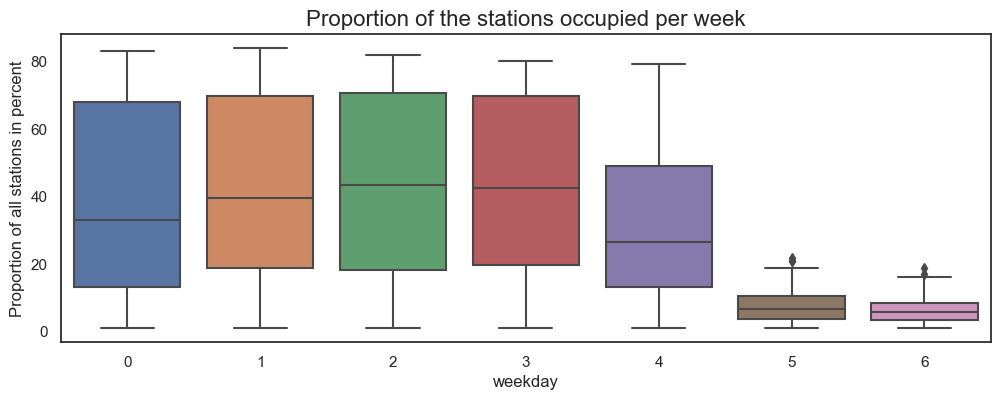

In [286]:
#plot the calculated proportion of the fleet per week
fig,ax = plt.subplots(figsize=(12,4)) 
sns.boxplot(x=charging_sessions_modified_tempered_week1.index.get_level_values(1), y=charging_sessions_modified_tempered_week1["percentage"],ax=ax)
ax.set_title("Proportion of the stations occupied per week",fontsize=16)
plt.ylabel('Proportion of all stations in percent')
plt.xlabel('weekday')
plt.savefig("weekproportion.jpeg")
plt.show()

In [287]:
#create a dataframe with the number of different stations IDs borrowed in a week
charging_sessions_modified_tempered_year1= data.groupby([data["connectionTime"].dt.date,"month"])["combinedSpaceStationID"].nunique()
charging_sessions_modified_tempered_year1= pd.DataFrame(charging_sessions_modified_tempered_year1)

In [288]:
#insert a new column with the calculated proportion of the fleet borrowed in one week
charging_sessions_modified_tempered_year1["percentage"]=(charging_sessions_modified_tempered_year1["combinedSpaceStationID"]/number_stations)*100

In [289]:
charging_sessions_modified_tempered_year1

,,combinedSpaceStationID,percentage
connectionTime,month,,
2018-04-30,4,1,0.952381
2018-05-07,5,1,0.952381
2018-05-11,5,1,0.952381
2018-05-14,5,1,0.952381
2018-05-15,5,1,0.952381
...,...,...,...
2021-09-10,9,36,34.285714
2021-09-11,9,8,7.619048
2021-09-12,9,9,8.571429


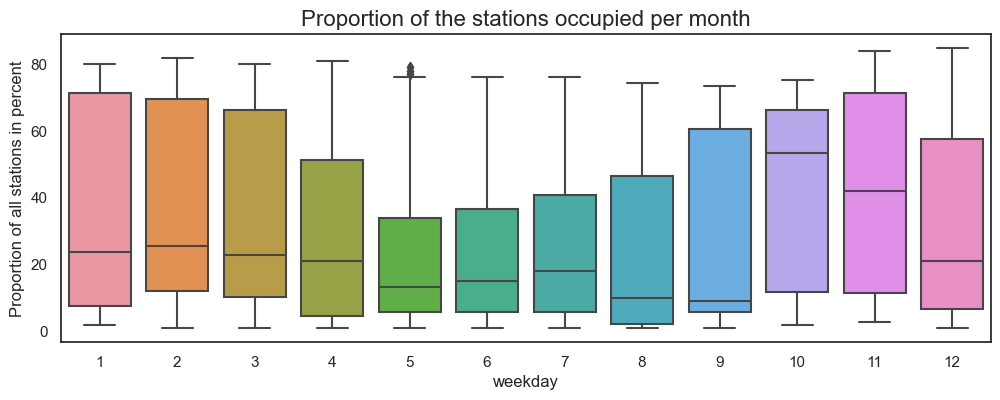

In [290]:
#plot the calculated proportion of the fleet per week
fig,ax = plt.subplots(figsize=(12,4)) 
sns.boxplot(x=charging_sessions_modified_tempered_year1.index.get_level_values(1), y=charging_sessions_modified_tempered_year1["percentage"],ax=ax)
ax.set_title("Proportion of the stations occupied per month",fontsize=16)
plt.ylabel('Proportion of all stations in percent')
plt.xlabel('weekday')
plt.savefig("weekproportion.jpeg")
plt.show()

**KPI 6**: Total kWh Charged\
Utilization can also be seen by reviewing the total number of KWh that have been charged at certain times. For visualization we use a boxplot.

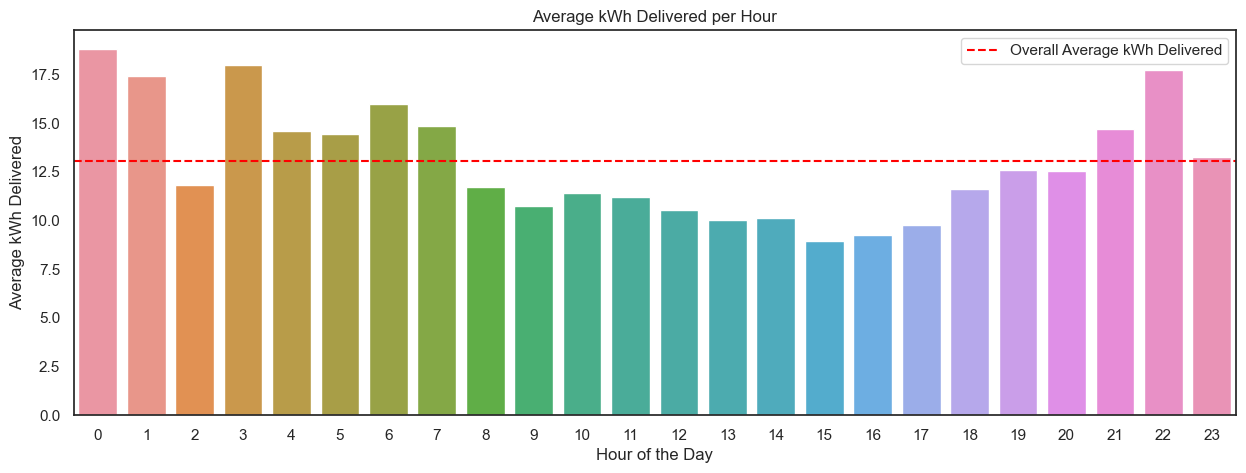

In [291]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Calculate the average kWh delivered per hour - only possible for registered users 
avg_kwh_per_hour = data.groupby('hour_connecttime')['kWhDelivered'].mean().reset_index()

# Calculate the overall average of kWh delivered
overall_avg_kwh = data['kWhDelivered'].mean()

# Plotting the average kWh delivered per hour
plt.figure(figsize=(15, 5))
sns.barplot(x="hour_connecttime", y="kWhDelivered", data=avg_kwh_per_hour)
plt.title("Average kWh Delivered per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average kWh Delivered")

# Add a horizontal line for the overall average
plt.axhline(overall_avg_kwh, color='red', linestyle='--', label='Overall Average kWh Delivered')

# Adding a legend to explain the line
plt.legend()

plt.show()


### KPI 7: Most utilized Stations 

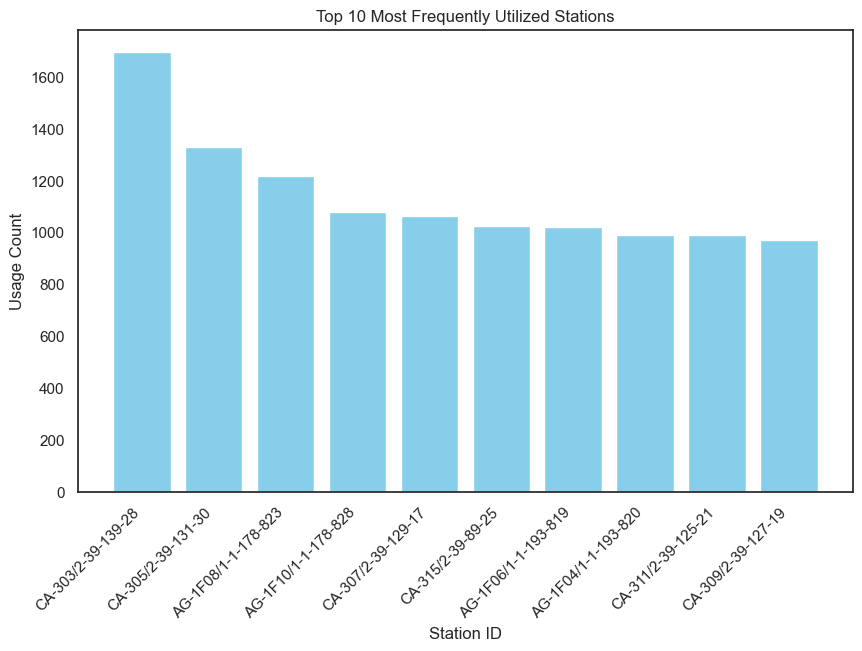

In [292]:
import matplotlib.pyplot as plt

# Assuming 'sorted_stations' is a pandas Series with station IDs as index and their respective counts as values
sorted_stations = original['combinedSpaceStationID'].value_counts()

# 'station_counts' now contains the count of connections for each station
sorted_stations = sorted_stations.sort_values(ascending=False)

# Extracting data for plotting
station_ids = sorted_stations.index[:10]  # Adjust the number to display more or fewer stations
counts = sorted_stations.values[:10]

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(station_ids, counts, color='skyblue')
plt.title('Top 10 Most Frequently Utilized Stations')
plt.xlabel('Station ID')
plt.ylabel('Usage Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.show()


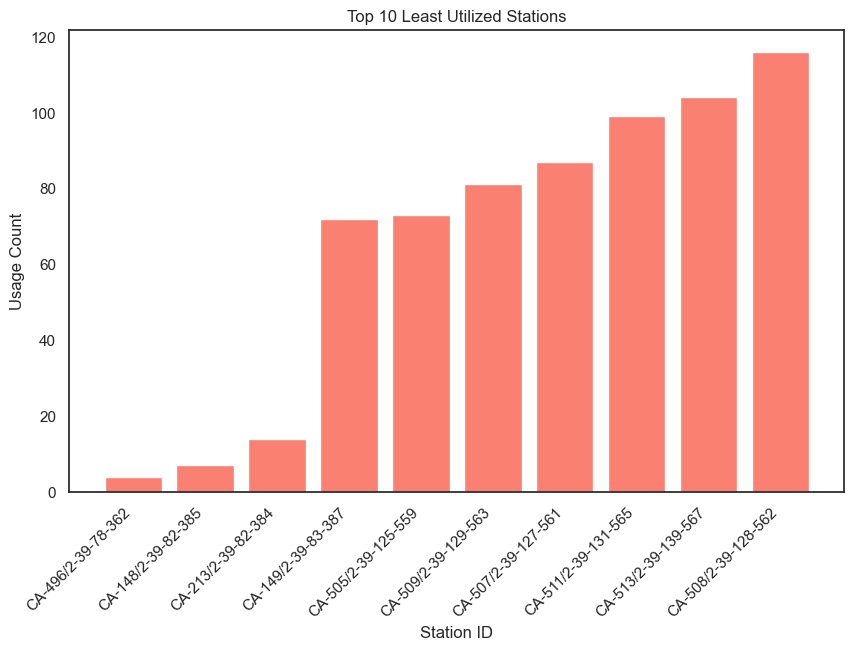

In [293]:
import matplotlib.pyplot as plt

# Assuming 'sorted_stations' is a pandas Series with station IDs as index and their respective counts as values

# Sorting stations by usage count in ascending order for least utilized stations
sorted_stations_least = sorted_stations.sort_values(ascending=True)

# Extracting data for plotting
station_ids_least = sorted_stations_least.index[:10]  # Adjust the number to display more or fewer stations
counts_least = sorted_stations_least.values[:10]

# Creating a bar plot for least utilized stations
plt.figure(figsize=(10, 6))
plt.bar(station_ids_least, counts_least, color='salmon')
plt.title('Top 10 Least Utilized Stations')
plt.xlabel('Station ID')
plt.ylabel('Usage Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.show()


### Downtime

In [294]:
import pandas as pd

# Assuming you have a DataFrame 'charging_sessions_modified' with the necessary columns

# Sort the DataFrame by 'combinedSpaceStationID' and 'disconnectTime'
charging_sessions_modified_DOWNTIME_failed = original.sort_values(by=['combinedSpaceStationID', 'disconnectTime'])
charging_sessions_modified_DOWNTIME_failed

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,combinedSpaceStationID,timeConnected,idleTime,chargingTime,...,modifiedAt,paymentRequired,requestedDeparture,hour_connecttime,hour_disconnecttime,date_connecttime,weekday_connecttime,month_connecttime,chargingTime_minutes,connectionhour
44916,2018-10-08 22:44:47+00:00,2018-10-09 00:59:14+00:00,2018-10-09 00:56:20+00:00,10.208,1,NaN,AG-1F01/1-1-193-825,8067.0,174.0,7893.0,...,NaN,None,NaN,14,16,2018-10-08,0,10,131.550000,14
44930,2018-10-09 13:08:55+00:00,2018-10-09 22:03:56+00:00,2018-10-09 17:33:24+00:00,11.837,1,NaN,AG-1F01/1-1-193-825,32101.0,16232.0,15869.0,...,NaN,None,NaN,5,14,2018-10-09,1,10,264.483333,5
44985,2018-10-09 22:26:40+00:00,2018-10-10 02:48:12+00:00,2018-10-10 02:28:29+00:00,12.034,1,383.0,AG-1F01/1-1-193-825,15692.0,1183.0,14509.0,...,"Tue, 09 Oct 2018 22:26:41 GMT",True,"Wed, 10 Oct 2018 02:18:40 GMT",14,18,2018-10-09,1,10,241.816667,14
45001,2018-10-10 13:15:02+00:00,2018-10-10 22:30:44+00:00,2018-10-10 17:56:11+00:00,11.985,1,NaN,AG-1F01/1-1-193-825,33342.0,16473.0,16869.0,...,NaN,None,NaN,5,14,2018-10-10,2,10,281.150000,5
45054,2018-10-10 22:52:56+00:00,2018-10-11 00:34:00+00:00,2018-10-11 00:11:04+00:00,7.863,1,NaN,AG-1F01/1-1-193-825,6064.0,1376.0,4688.0,...,NaN,None,NaN,14,16,2018-10-10,2,10,78.133333,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20901,2019-05-13 19:43:12+00:00,2019-05-13 21:54:33+00:00,2019-05-13 20:46:37+00:00,2.308,2,560.0,CA-513/2-39-139-567,7881.0,4076.0,3805.0,...,"Mon, 13 May 2019 19:43:30 GMT",True,"Mon, 13 May 2019 21:56:12 GMT",11,13,2019-05-13,0,5,63.416667,11
21817,2019-06-13 16:53:42+00:00,2019-06-13 17:35:12+00:00,2019-06-13 17:24:57+00:00,0.908,2,NaN,CA-513/2-39-139-567,2490.0,615.0,1875.0,...,NaN,None,NaN,8,9,2019-06-13,3,6,31.250000,8
23907,2019-09-16 13:55:08+00:00,2019-09-16 15:34:27+00:00,2019-09-16 14:25:44+00:00,0.893,2,NaN,CA-513/2-39-139-567,5959.0,4123.0,1836.0,...,NaN,None,NaN,5,7,2019-09-16,0,9,30.600000,5
25330,2019-11-06 15:28:18+00:00,2019-11-06 16:41:56+00:00,2019-11-06 15:58:42+00:00,0.900,2,NaN,CA-513/2-39-139-567,4418.0,2594.0,1824.0,...,NaN,None,NaN,7,8,2019-11-06,2,11,30.400000,7


In [295]:
import pandas as pd

# Calculate downtime in minutes and store it in a new column 'downTime_minutes'
charging_sessions_modified_DOWNTIME_failed['downTime_minutes'] = (charging_sessions_modified_DOWNTIME_failed.groupby('combinedSpaceStationID')['connectionTime'].shift(-1) - charging_sessions_modified_DOWNTIME_failed['disconnectTime']).dt.total_seconds() / 60

# Fill NaN values in the last row of each group with 0 (since there is no next session)
charging_sessions_modified_DOWNTIME_failed['downTime_minutes'] = charging_sessions_modified_DOWNTIME_failed['downTime_minutes'].fillna(0)

# Sum and calculate the mean downtime in minutes for each 'combinedSpaceStationID'
result = charging_sessions_modified_DOWNTIME_failed.groupby('combinedSpaceStationID').agg(
    sumDownTime_minutes=pd.NamedAgg(column='downTime_minutes', aggfunc='sum'),
    avgDownTime_minutes=pd.NamedAgg(column='downTime_minutes', aggfunc='mean')
).reset_index()

result


,combinedSpaceStationID,sumDownTime_minutes,avgDownTime_minutes
0,AG-1F01/1-1-193-825,1.237123e+06,1600.417270
1,AG-1F02/1-1-193-827,1.175456e+06,1277.669203
2,AG-1F03/1-1-193-829,1.244222e+06,1647.976490
3,AG-1F04/1-1-193-820,1.181700e+06,1194.843327
4,AG-1F05/1-1-193-816,1.237031e+06,1664.914468
...,...,...,...
101,CA-509/2-39-129-563,8.654310e+05,10684.333951
102,CA-510/2-39-130-564,9.029210e+05,6788.879825
103,CA-511/2-39-131-565,7.980636e+05,8061.248822
104,CA-512/2-39-138-566,1.638978e+06,9873.362550


In [296]:
import pandas as pd
# Calculate downtime in minutes and store it in a new column 'downTime_minutes'
charging_sessions_modified_DOWNTIME_failed['downTime_minutes'] = (
    charging_sessions_modified_DOWNTIME_failed.groupby('combinedSpaceStationID')['connectionTime']
    .shift(-1) - charging_sessions_modified_DOWNTIME_failed['disconnectTime']
).dt.total_seconds() / 60

# Fill NaN values in the last row of each group with 0 (since there is no next session)
charging_sessions_modified_DOWNTIME_failed['downTime_minutes'] = charging_sessions_modified_DOWNTIME_failed['downTime_minutes'].fillna(0)

# Sum and calculate the mean downtime in minutes for each 'combinedSpaceStationID' and 'hour_of_downtime'
result = charging_sessions_modified_DOWNTIME_failed.groupby(['combinedSpaceStationID', 'hour_disconnecttime']).agg(
    sumDownTime_minutes=pd.NamedAgg(column='downTime_minutes', aggfunc='sum'),
    avgDownTime_minutes=pd.NamedAgg(column='downTime_minutes', aggfunc='mean')
).reset_index()


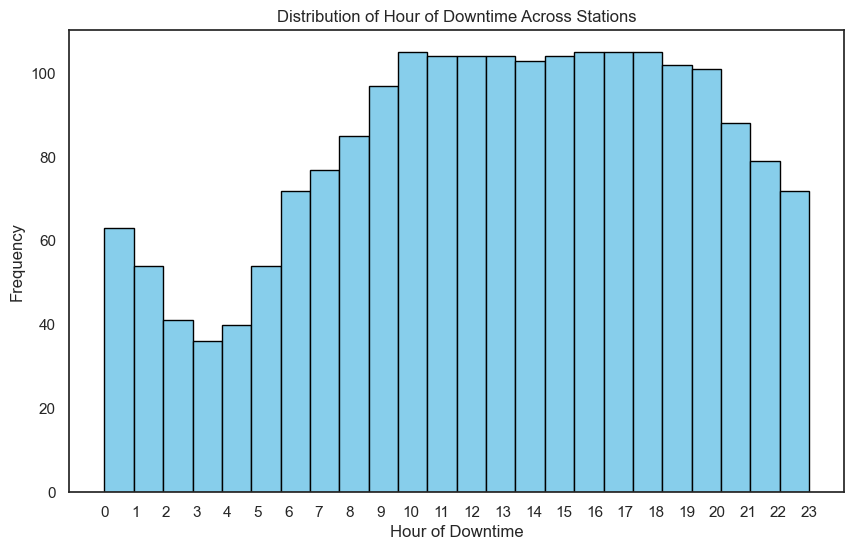

In [297]:
import matplotlib.pyplot as plt

# Assuming 'result' is the DataFrame with 'hour_of_downtime' column

# Plotting a histogram of 'hour_of_downtime'
plt.figure(figsize=(10, 6))
plt.hist(result['hour_disconnecttime'], bins=24, edgecolor='black', color='skyblue')
plt.title('Distribution of Hour of Downtime Across Stations')
plt.xlabel('Hour of Downtime')
plt.ylabel('Frequency')
plt.xticks(range(24))  # Set x-axis ticks to represent each hour
plt.show()


When does a downtime usually starts?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Overall Average downtime (in min): 5006.938937655112


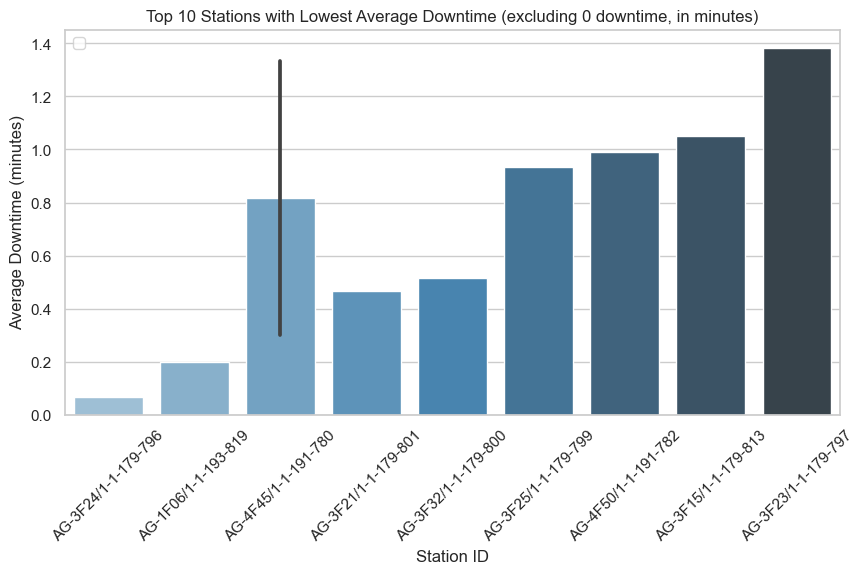

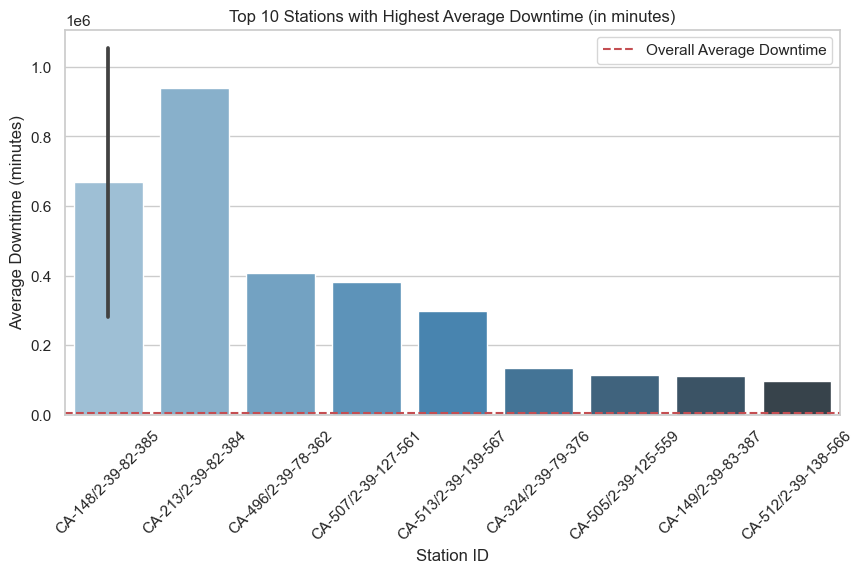

In [298]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'result' is your DataFrame after the aggregation as previously described

# Filter out stations with an average downtime of 0 minutes
result_filtered = result[result['avgDownTime_minutes'] > 0]

# Now, proceed with sorting and selecting the top 10 for lowest and highest average downtime
# For the lowest average downtime, excluding 0 downtime stations, sort in ascending order
result_sorted_ascending = result_filtered.sort_values(by='avgDownTime_minutes', ascending=True)
top_10_lowest_avg_downtime = result_sorted_ascending.head(10)

# For the highest average downtime, sort in descending order
result_sorted_descending = result_filtered.sort_values(by='avgDownTime_minutes', ascending=False)
top_10_highest_avg_downtime = result_sorted_descending.head(10)

# Calculate the overall average downtime in minutes, excluding stations with 0 downtime
overall_avg_downtime = result_filtered['avgDownTime_minutes'].mean()

# Set the style of the visualization
sns.set(style="whitegrid")

# Visualization code with the filtered results
# For top 10 lowest average downtime (excluding 0 downtime stations)
plt.figure(figsize=(10, 5))
sns.barplot(x='combinedSpaceStationID', y='avgDownTime_minutes', data=top_10_lowest_avg_downtime, palette="Blues_d")
#plt.axhline(overall_avg_downtime, color='r', linestyle='--', label='Overall Average Downtime')
plt.title('Top 10 Stations with Lowest Average Downtime (excluding 0 downtime, in minutes)')
plt.xlabel('Station ID')
plt.ylabel('Average Downtime (minutes)')
plt.xticks(rotation=45)
plt.legend()
print("Overall Average downtime (in min):", overall_avg_downtime)

plt.show()

# For top 10 highest average downtime
plt.figure(figsize=(10, 5))
sns.barplot(x='combinedSpaceStationID', y='avgDownTime_minutes', data=top_10_highest_avg_downtime,palette="Blues_d")
plt.axhline(overall_avg_downtime, color='r', linestyle='--', label='Overall Average Downtime')
plt.title('Top 10 Stations with Highest Average Downtime (in minutes)')
plt.xlabel('Station ID')
plt.ylabel('Average Downtime (minutes)')
plt.xticks(rotation=45)
plt.legend()

plt.show()




**Registered and Unregistered Customer Ratio**
- Formula: (Number of Registered Customers) / (Number of Unregistered Customers)
- Description: Compares the ratio of registered (loyal) customers to unregistered (casual) customers, providing insights into registration program effectiveness and customer retention.


Registered to Unregistered Customers Ratio: 2.712878439613844


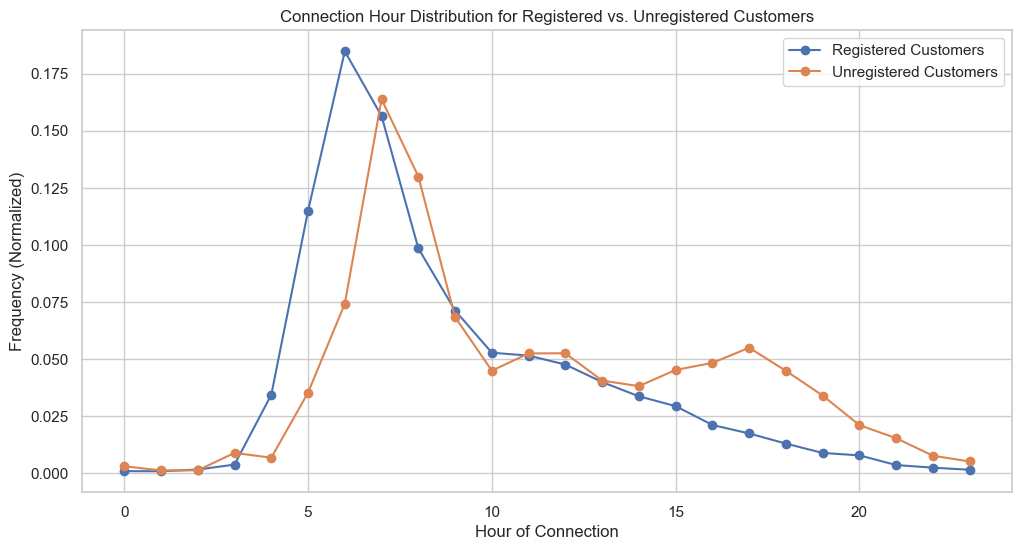

In [299]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named charging_sessions_modified

# Separate registered and unregistered customers
registered_customers = original[original['userID'].notnull()]
unregistered_customers = original[original['userID'].isnull()]
# Calculate the ratio of registered to unregistered customers
registered_count = len(registered_customers)
unregistered_count = len(unregistered_customers)
registered_to_unregistered_ratio = registered_count / unregistered_count

print("Registered to Unregistered Customers Ratio:", registered_to_unregistered_ratio)

# Analyze when registered users typically connect compared to unregistered users
registered_hourly_distribution = registered_customers['connectionhour'].value_counts(normalize=True).sort_index()
unregistered_hourly_distribution = unregistered_customers['connectionhour'].value_counts(normalize=True).sort_index()

# Plot the connection hours for registered and unregistered customers
plt.figure(figsize=(12, 6))
plt.plot(registered_hourly_distribution.index, registered_hourly_distribution.values, label='Registered Customers', marker='o')
plt.plot(unregistered_hourly_distribution.index, unregistered_hourly_distribution.values, label='Unregistered Customers', marker='o')
plt.xlabel('Hour of Connection')
plt.ylabel('Frequency (Normalized)')
plt.title('Connection Hour Distribution for Registered vs. Unregistered Customers')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


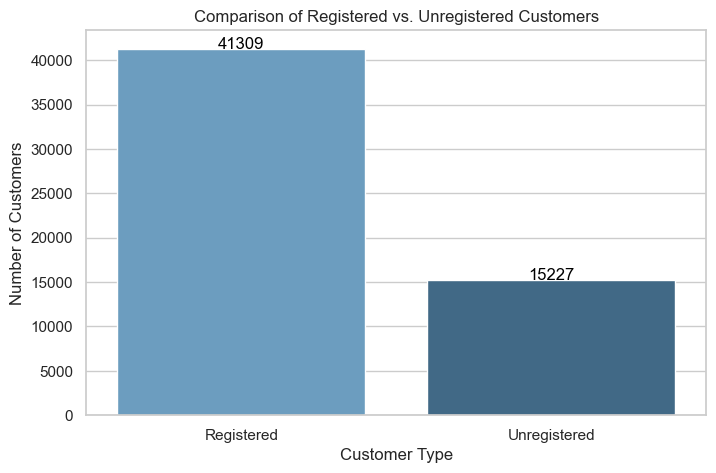

In [300]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Data preparation for plotting
data = {
    'Customer Type': ['Registered', 'Unregistered'],
    'Count': [registered_count, unregistered_count]
}
df = pd.DataFrame(data)

# Create the plot using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Customer Type', y='Count', data=df, palette='Blues_d')

# Adding the count on top of each bar for clarity
for index, row in df.iterrows():
    plt.text(row.name, row.Count, str(row.Count), color='black', ha="center")

plt.title('Comparison of Registered vs. Unregistered Customers')
plt.ylabel('Number of Customers')

# Show the plot
plt.show()
